### Study the overlap between the coherent tune and the incoherent spectrum by applying FFT on the tbt data of the bunch centroid motion. 

**Schottky method:**

- Track very few particles ~1e4, comparing to the 5e5 particles usually used for the simulations with impedance. There are not enough particles to compute the centroid with accuracy. This noise will result to the incoherent spectrum. That’s why a few particles are needed. Many turns are necessary (here 2**17)

- Note: Due to the small number of macroparticles, in the presence of the impedance most likely you will have some emittance growth. But it is negelted for now. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import os
import sys
sys.path.append('../../utils')
from cmpt_TuneSpreads import *
from coordinatesConversions import *

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 7,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)
plt.close('all')

In [3]:
def find_tune(a): # find and return the frequency with the maximum amplitude
    max_fft = max(a)
    my_index = [i for i, j in enumerate(a) if j == max_fft]
    return my_index

In [4]:
def cmpt_psd(n_turns, frev, fft):
    time = np.arange(int(n_turns))/frev # convert from turns to time
    Dt = time[1]-time[0] # sampling (s)
    #print(Dt)

    # freq = np.linspace(0, N/time[-1], N)  # [0, 2frev]
    freq_psd = np.fft.fftfreq(int(n_turns), Dt) # [-frev/2, frev/2]
    Df = freq_psd[1]-freq_psd[0]

    print('sampling ratio Df={}'.format(Df))
   
    #### To obtain a more precise value of PSD, we use the average of 10000 FFTs
    dft_1 = np.abs(fft)**2  
    PSD_1 = dft_1/(Df*(n_turns/2)**2) # power spectral density

    return freq_psd, PSD_1

### Study parameters

In [5]:
gamma = 287.8
beta = np.sqrt(1 - 1/gamma**2)
circumference = 6911.5623
frev = 299792458/circumference
n_turns = 1e6
intensity = 3.0e10

ayy, axy = 1500, 0.0
Qpy=1
wakes = 'ON'

In [6]:
intensity_scan = np.linspace(0, 5e10, 25)

### Load tbt data for each intensity value

In [13]:
load_from_afs = True

path2data ='/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
study_name=f'sps_forSchottky_tbt_270GeV_NoNoise_WakesON_ayy1500_QpxQpy1_6D_Nb1e4_intensity'

#### Load all data in a dictionary and damp in a data frame

In [17]:
if load_from_afs:
    meanY_list, meanX_list = [], []
    emitY_list, emitX_list = [], []


    for intensity in intensity_scan:
        print(intensity) # print to see the progress
        meanX, meanY, emitX, emitY = np.loadtxt(path2data+f'{study_name}{intensity/1e10:.2f}e10_fixedKicksSet0_run0/file.txt', delimiter = ",", unpack = True)
        #meanX, meanY, emitX, emitY = np.loadtxt(path2data+f'{study_name}/file_intensity{intensity:.2f}e10_set0_run0.txt', delimiter = ",", unpack = True)
        meanX_list.append(meanX)
        meanY_list.append(meanY)
        emitX_list.append(emitX)
        emitY_list.append(emitY)
        
    data = {}
    for i, intensity in enumerate(intensity_scan):
        data[f'intensity_{intensity/1e10:.2f}e10'] =[meanX_list[i], meanY_list[i], emitX_list[i], emitY_list[i]]
    df = pd.DataFrame(data, index=['meanX','meanY','emitX', 'emitY'])



0.0
2083333333.3333333
4166666666.6666665
6250000000.0
8333333333.333333
10416666666.666666
12500000000.0
14583333333.333332
16666666666.666666
18750000000.0
20833333333.333332
22916666666.666664
25000000000.0
27083333333.333332
29166666666.666664
31250000000.0
33333333333.333332
35416666666.666664
37500000000.0
39583333333.33333
41666666666.666664
43750000000.0
45833333333.33333
47916666666.666664
50000000000.0


In [18]:
savedata=True
if savedata:
    filename = f'tbtData_{study_name}Scan_x-plane.pkl'
    if not os.path.exists(filename):
        df.to_pickle(filename)

#### Load tbt data from a pickle file

In [19]:
if not load_from_afs:
    print('Load from file')
    print(f'tbtData_{study_name}Scan.pkl')
    df = pickle.load(open(f'tbtData_sps_forSchottky_tbt_270GeV_NoNoise_WakesON_ayy1500_QpxQpy1_6D_Nb1e4_intensityScan.pkl', 'rb'))

In [20]:
df

,intensity_0.00e10,intensity_0.21e10,intensity_0.42e10,intensity_0.62e10,intensity_0.83e10,intensity_1.04e10,intensity_1.25e10,intensity_1.46e10,intensity_1.67e10,intensity_1.88e10,...,intensity_3.12e10,intensity_3.33e10,intensity_3.54e10,intensity_3.75e10,intensity_3.96e10,intensity_4.17e10,intensity_4.38e10,intensity_4.58e10,intensity_4.79e10,intensity_5.00e10
meanX,"[5.567118715542738e-05, -5.563925339436747e-06...","[5.1593240999214195e-05, -1.2191809761308822e-...","[4.9323936395591805e-05, -5.874732193419053e-0...","[5.726741158840749e-05, 3.677063622313808e-06,...","[5.482891501510773e-05, -1.4894151014736241e-0...","[5.5960230601105024e-05, -4.660567774695441e-0...","[4.3157031472335284e-05, -6.768306862985169e-0...","[5.142541380780401e-05, -1.8760273173546774e-0...","[6.147775866840823e-05, 3.2389935636893365e-06...","[4.992446055607091e-05, -1.991312263931426e-06...",...,"[4.380511322402484e-05, -9.047973685347976e-06...","[5.546107508105944e-05, -1.3459651232473287e-0...","[4.6661703641260044e-05, -1.2999246239231022e-...","[5.623520056547511e-05, -8.036651080004181e-06...","[4.862668012076823e-05, -8.787307555427685e-06...","[5.5484137190861806e-05, -5.353633858745751e-0...","[5.2711552330219935e-05, -3.1952892016842724e-...","[5.165549830030486e-05, -7.064269453114008e-06...","[5.2160172642754966e-05, -2.4174190040840424e-...","[5.5601653279423794e-05, -2.5424662870954835e-..."
meanY,"[3.1880861500534456e-06, 1.3141334198554961e-0...","[9.037178984191607e-06, -4.508213305276219e-06...","[7.585590076458884e-06, 4.82440043394092e-06, ...","[4.487612438403435e-06, 2.4746256947183413e-06...","[5.775208024856578e-06, 6.548967407455068e-06,...","[-1.1490834348477942e-05, -2.4141812229639243e...","[-1.6654161742164508e-06, -5.1014192952895305e...","[9.467550029173882e-06, -4.541021558151896e-06...","[-9.505407189641667e-06, -1.4107266380573463e-...","[1.4160811860504497e-06, 6.425614254994964e-06...",...,"[7.3866097388454745e-06, 3.624962327633197e-06...","[4.252795242961113e-07, 6.9733718184519065e-06...","[2.0614753655247926e-05, -5.538825094996985e-0...","[6.52013228427266e-06, -1.5403058829333065e-06...","[-1.9625345602572398e-05, -5.55794784409798e-0...","[2.7808641257798043e-07, -8.289010753297136e-0...","[-5.236553332231504e-06, -8.569914563298432e-0...","[-1.0169602887087623e-05, -7.1769618490556425e...","[8.992461345708997e-06, 1.2199471890658501e-05...","[-1.3091167929667499e-05, -8.933295579240131e-..."
emitX,"[2.249868039683686e-06, 2.2498581149457e-06, 2...","[2.28899517002198e-06, 2.288998810756051e-06, ...","[2.2910032317112613e-06, 2.2910046828681537e-0...","[2.3239980359822896e-06, 2.323988158476241e-06...","[2.2808072210518546e-06, 2.280806276075081e-06...","[2.350677066626132e-06, 2.3506757122906045e-06...","[2.317674814224341e-06, 2.317678539944904e-06,...","[2.328232153196294e-06, 2.3282263974693633e-06...","[2.298374091033403e-06, 2.2983692411637992e-06...","[2.2877260281986564e-06, 2.2877057325710634e-0...",...,"[2.2888647293071118e-06, 2.288837738937647e-06...","[2.273049402063593e-06, 2.273067760457149e-06,...","[2.2779126244918664e-06, 2.2779003118821706e-0...","[2.288884857790287e-06, 2.288849360944682e-06,...","[2.309644581306739e-06, 2.309635200302019e-06,...","[2.2583616571262337e-06, 2.2583841522391085e-0...","[2.318062765529998e-06, 2.3181023152571727e-06...","[2.3047375723109226e-06, 2.3047229240248476e-0...","[2.2790679885189075e-06, 2.27912367451991e-06,...","[2.3202110348705015e-06, 2.320155104102689e-06..."
emitY,"[2.3187355128522045e-06, 2.318729722469233e-06...","[2.2843444820220297e-06, 2.2843462073632402e-0...","[2.2402250754804707e-06, 2.2402242094929535e-0...","[2.2801763423756754e-06, 2.2801798026893302e-0...","[2.3072525348137546e-06, 2.307247213993656e-06...","[2.2980010449411335e-06, 2.2979786050529443e-0...","[2.273337562166629e-06, 2.273336034375662e-06,...","[2.2865512856350583e-06, 2.2865569629693235e-0...","[2.2747272705723614e-06, 2.2747395608084594e-0...","[2.2887377

### Compute the tunes for each intensity

As tune is considered the frequency of the maximum FFT amplitude

In [21]:
coherent_tunes_list_y = [] # Keep the coherent tune for each intensity value. It is determinded as the frequency at the maximum FFT amplitmpute
coherent_tunes_list_x = []

for intensity in intensity_scan:

    # y-plane
    meanY_temp = df[f'intensity_{intensity/1e10:.2f}e10']['meanY']
    fft = np.fft.fft(meanY_temp)
    n = meanY_temp.size
    freq = np.fft.fftfreq(n)
        
    # cmpt tune
    a = np.abs(fft[:n//2])
    tune_freq=find_tune(a) 
    coherent_tunes_list_y.append(freq[:n//2][tune_freq])
    
    
    # x-plane
    meanX_temp = df[f'intensity_{intensity/1e10:.2f}e10']['meanX']
    fft = np.fft.fft(meanX_temp)
    n = meanX_temp.size
    freq = np.fft.fftfreq(n)
        
    # cmpt tune
    a = np.abs(fft[:n//2])
    tune_freq=find_tune(a) 
    coherent_tunes_list_x.append(freq[:n//2][tune_freq])
    
    
    

### Plot the FFT for each intensity

tune freq [0.18]
tune freq [0.17997]
tune freq [0.179974]
tune freq [0.17996]
tune freq [0.179947]
tune freq [0.179955]
tune freq [0.17992]
tune freq [0.179908]
tune freq [0.179928]
tune freq [0.179904]
tune freq [0.179868]
tune freq [0.179881]
tune freq [0.179899]
tune freq [0.17986]
tune freq [0.179851]
tune freq [0.179839]
tune freq [0.179857]
tune freq [0.179819]
tune freq [0.179837]
tune freq [0.179848]


/home/natalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


tune freq [0.179786]
tune freq [0.179774]
tune freq [0.179765]
tune freq [0.179826]
tune freq [0.174636]


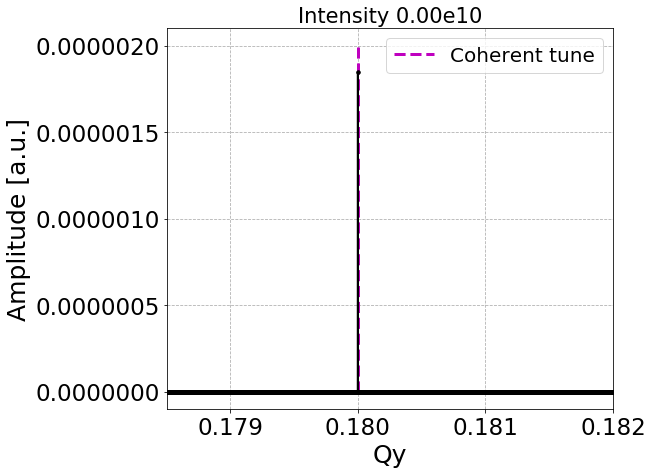

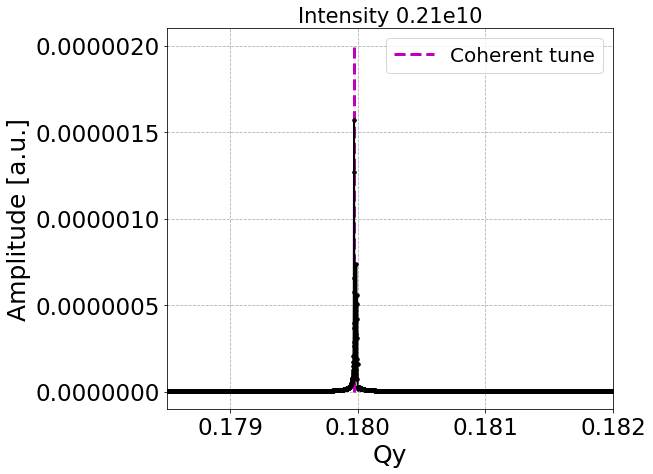

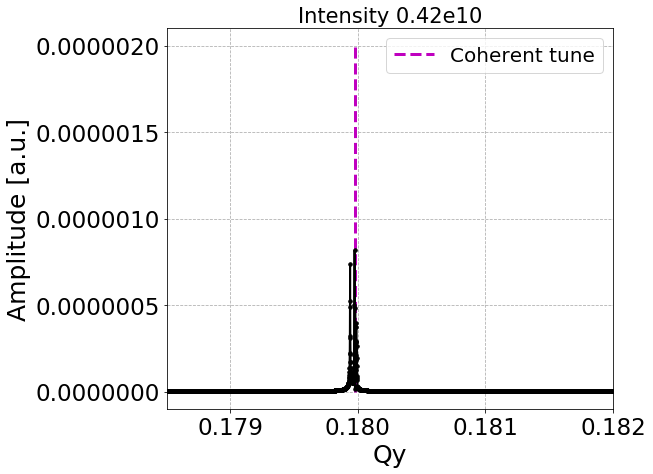

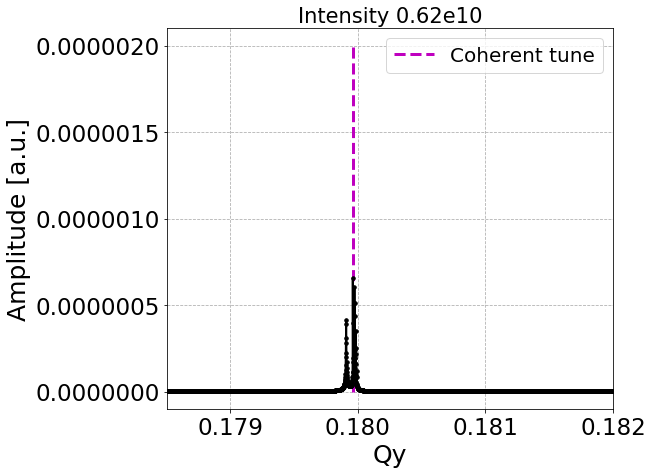

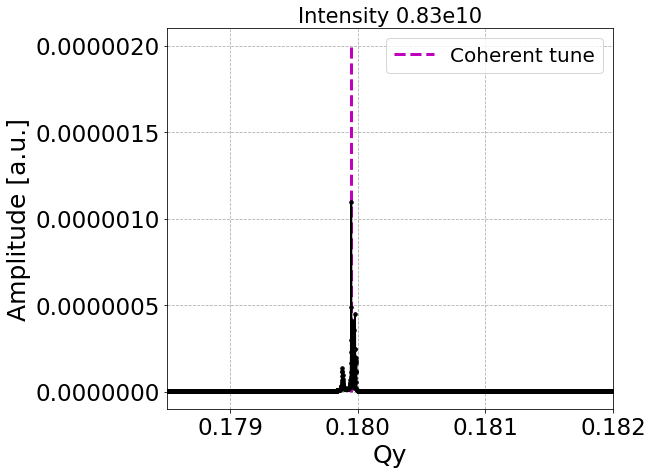

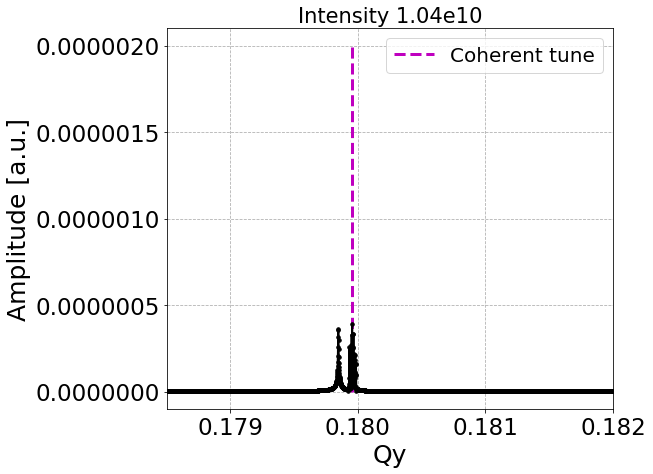

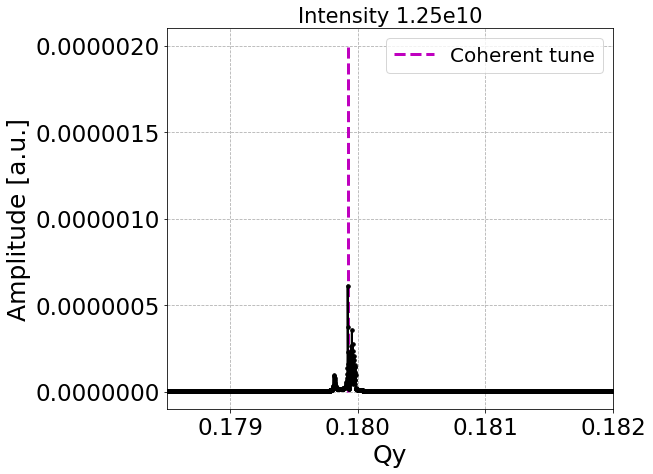

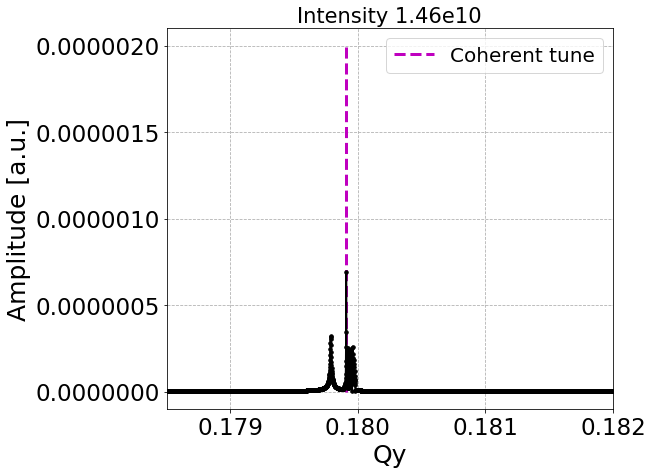

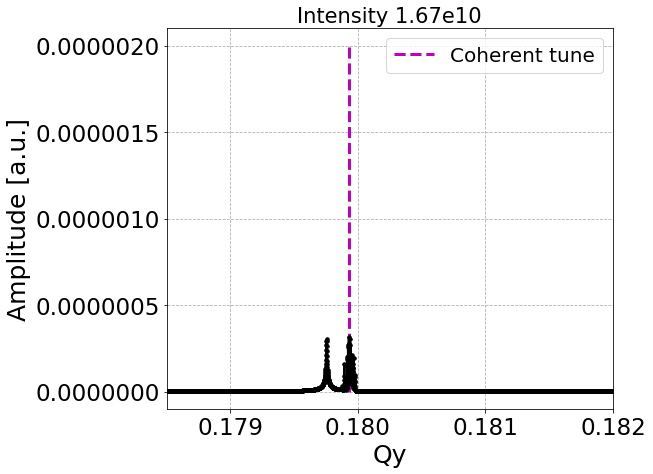

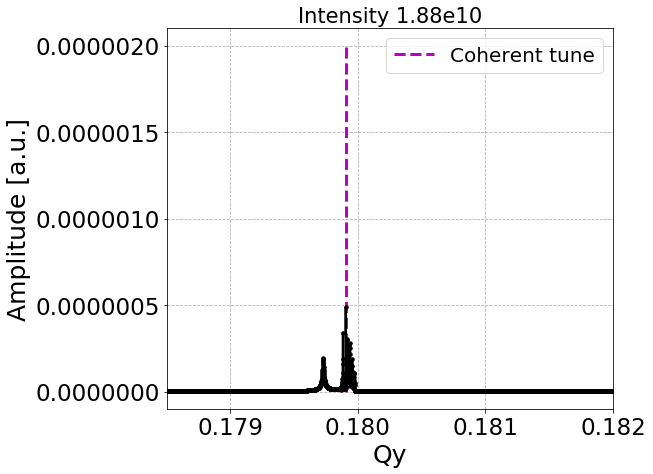

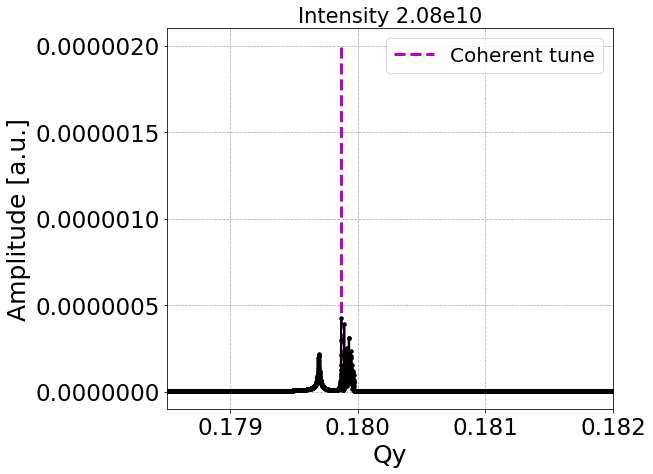

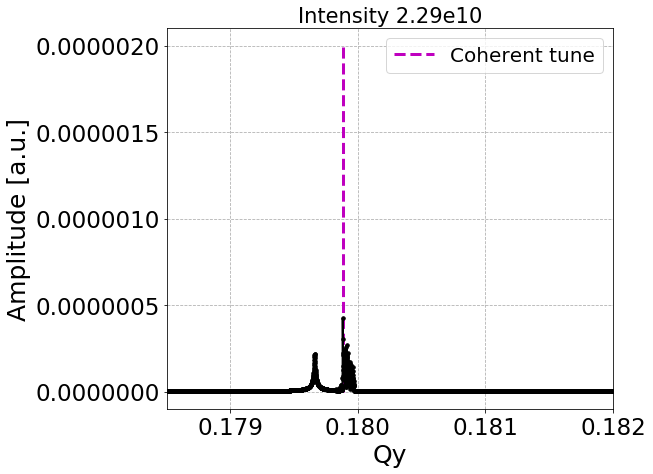

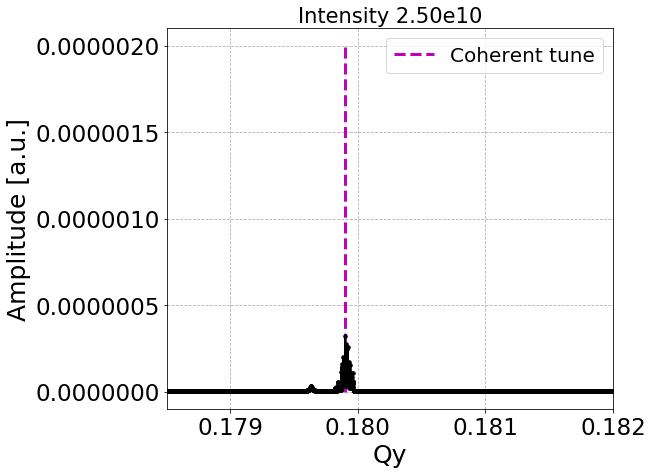

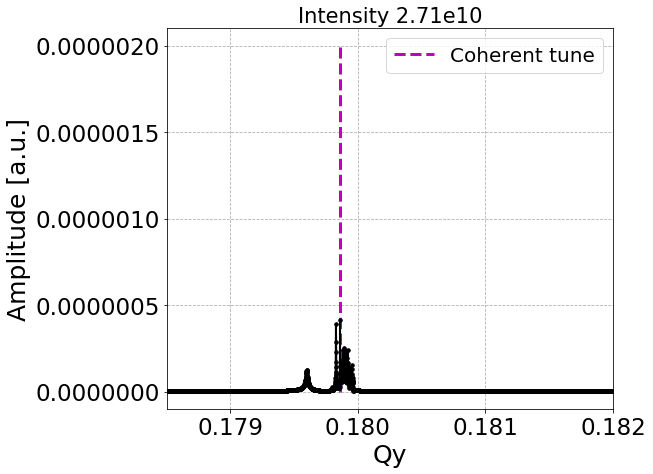

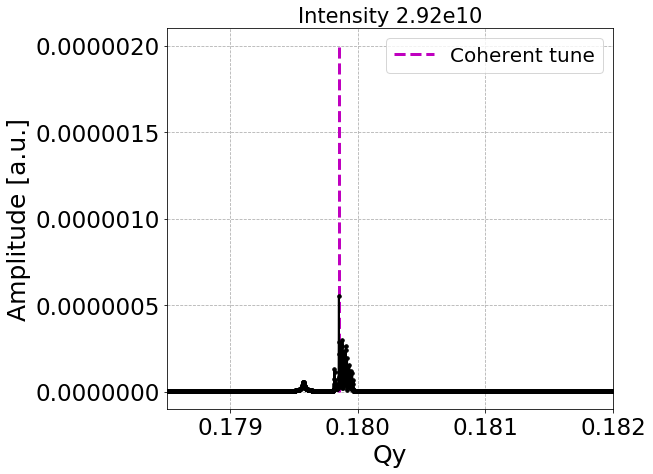

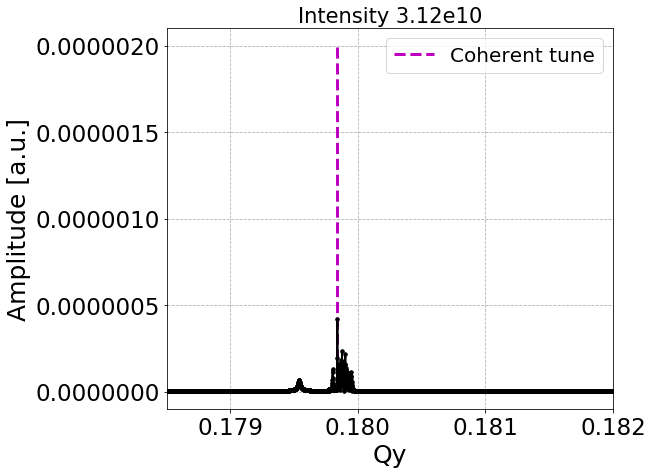

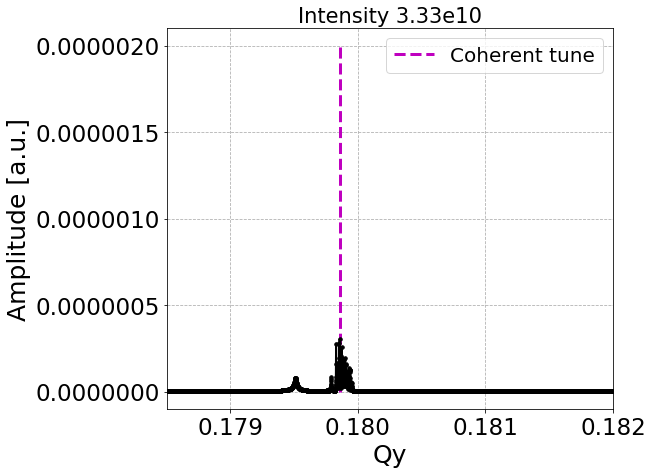

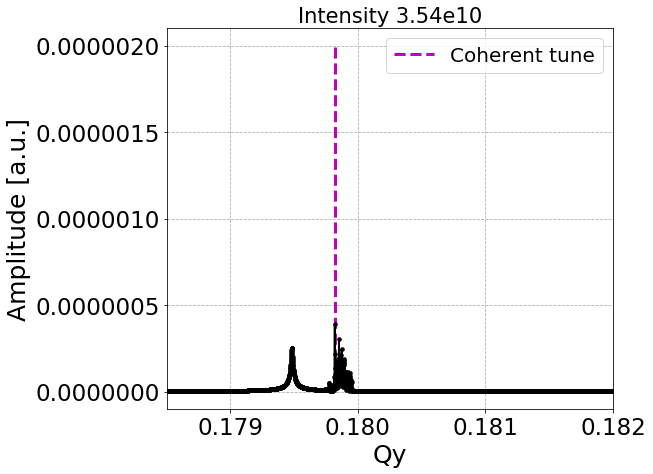

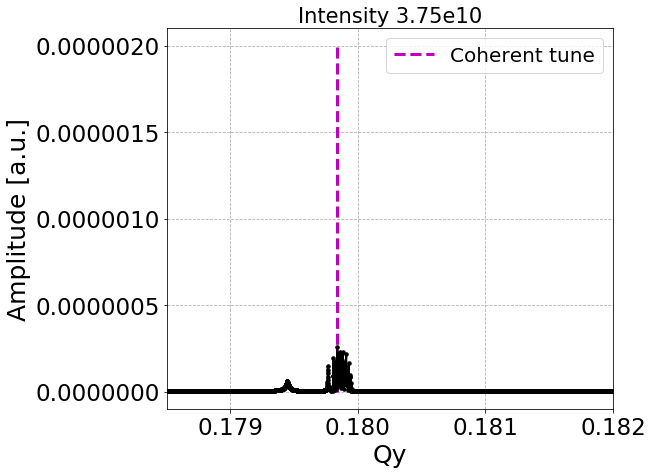

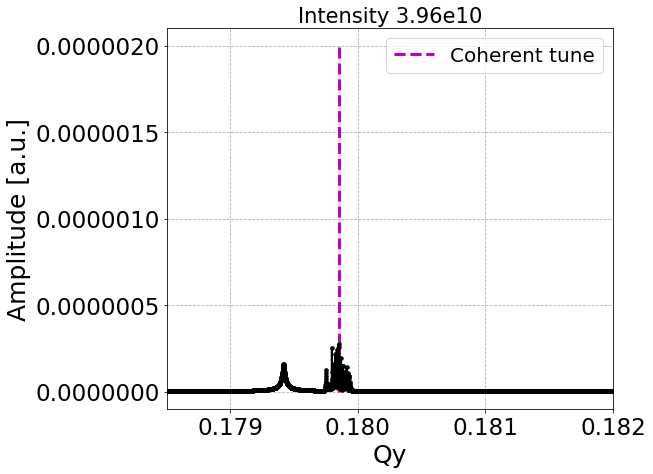

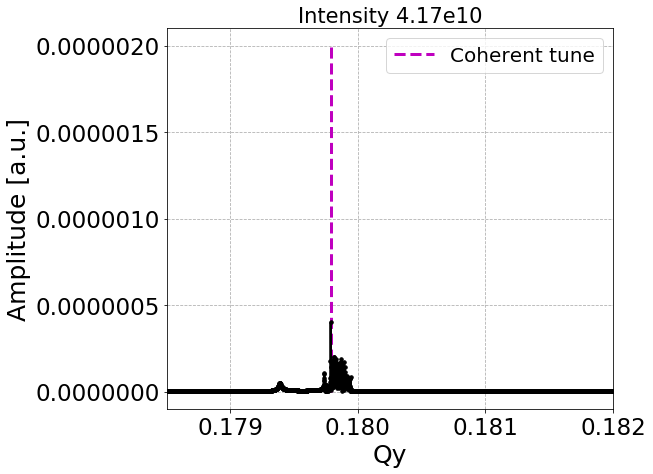

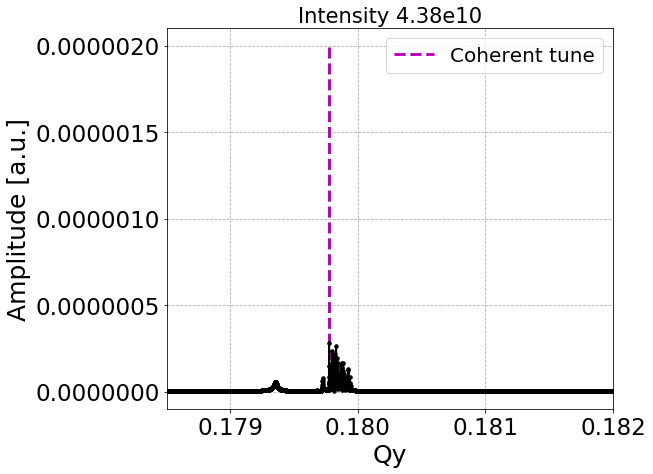

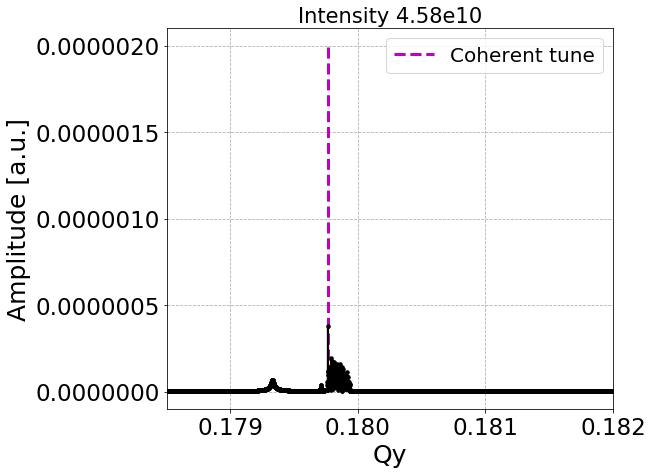

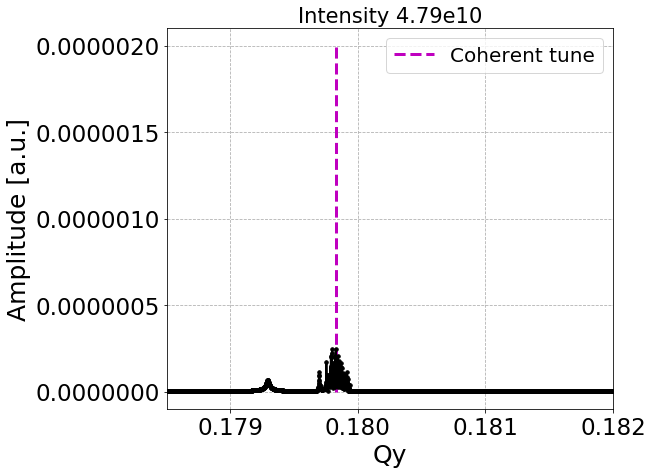

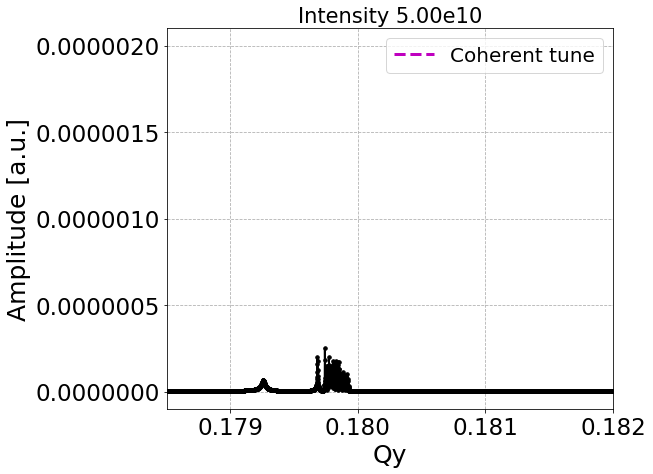

In [22]:
coherent_tunes_list_y = [] # Keep the coherent tune for each intensity value. It is determinded as the frequency at the maximum FFT amplitmpute
for intensity in intensity_scan:

    fig, ax = plt.subplots()
    
    try:
        meanY_temp = df[f'intensity_{intensity/1e10:.2f}e10']['meanY']
        fft = np.fft.fft(meanY_temp)
        n = meanY_temp.size
        freq = np.fft.fftfreq(n)
        
        # cmpt tune
        a = np.abs(fft[:n//2])
        tune_freq=find_tune(a) 
        coherent_tunes_list_y.append(freq[:n//2][tune_freq])
        
        ax.plot(freq[:n//2], np.abs(fft[:n//2]*1/n), '.-', c='k')
        ax.set_xlim(0.1785,0.182)
        
        ax.vlines(freq[:n//2][tune_freq], 0, 0.000002, lw=3, ls='--', color='m', label='Coherent tune') # plot tune
        print(f'tune freq {freq[:n//2][tune_freq]}')
    except OSError as err:
        print("OS error: {0}".format(err))

    ax.set_xlabel('Qy')
    ax.set_ylabel('Amplitude [a.u.]')


    #plt.xticks(rotation=15)

    #ax.tick_params(axis='both', which='both', direction='in', length=5, width=2)
    #ax.set_xlim(0.1785, 0.181)
    #ax.set_ylim(0, 20000) #33000

    ax.set_title(f'Intensity {intensity/1e10:.2f}e10')

    ax.grid(linestyle='dashed')
    ax.legend(loc=1)


    savefig = False
    if savefig:
        plt.savefig(f'output/fft_{study_name}_intensity{intensity/1e10:.2f}e10.png', bbox_inches='tight')

### Plot the PSD, y-plane, for each intensity value

sampling ratio Df=0.0433754981851209
tune freq [0.180042]
sampling ratio Df=0.0433754981851209
tune freq [0.179993]
sampling ratio Df=0.0433754981851209
tune freq [0.179971]
sampling ratio Df=0.0433754981851209
tune freq [0.179944]
sampling ratio Df=0.0433754981851209
tune freq [0.179915]
sampling ratio Df=0.0433754981851209
tune freq [0.179883]
sampling ratio Df=0.0433754981851209
tune freq [0.179857]
sampling ratio Df=0.0433754981851209
tune freq [0.179827]
sampling ratio Df=0.0433754981851209
tune freq [0.179796]
sampling ratio Df=0.0433754981851209
tune freq [0.179763]
sampling ratio Df=0.0433754981851209
tune freq [0.179732]
sampling ratio Df=0.0433754981851209
tune freq [0.179702]
sampling ratio Df=0.0433754981851209
tune freq [0.179668]
sampling ratio Df=0.0433754981851209
tune freq [0.179641]
sampling ratio Df=0.0433754981851209
tune freq [0.179615]
sampling ratio Df=0.0433754981851209
tune freq [0.179582]
sampling ratio Df=0.0433754981851209
tune freq [0.179546]
sampling ratio

/home/natalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


sampling ratio Df=0.0433754981851209
tune freq [0.179397]
sampling ratio Df=0.0433754981851209
tune freq [0.179364]
sampling ratio Df=0.0433754981851209
tune freq [0.179332]
sampling ratio Df=0.0433754981851209
tune freq [0.179301]


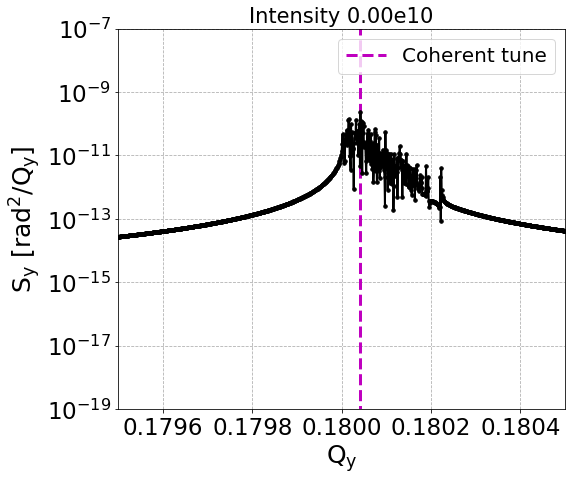

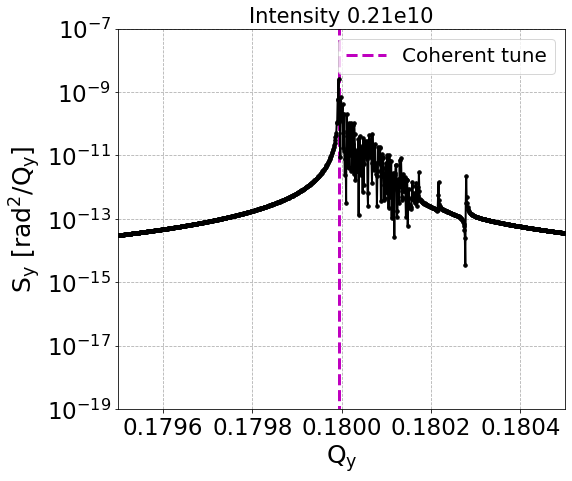

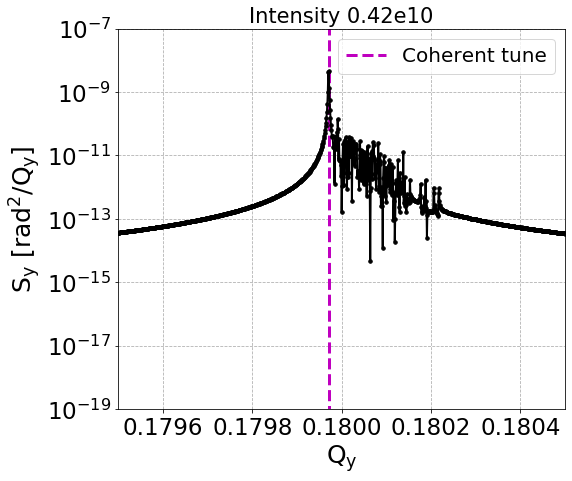

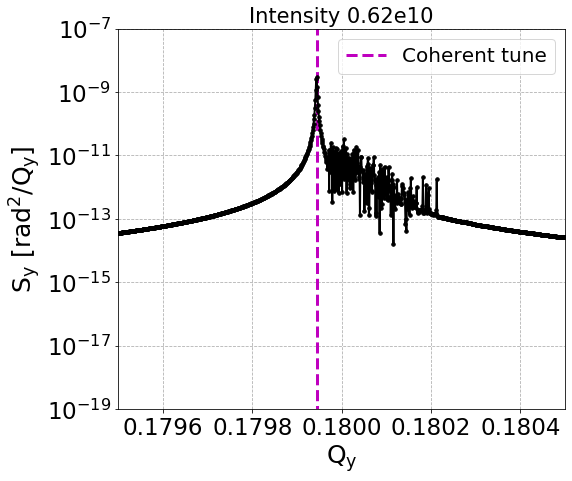

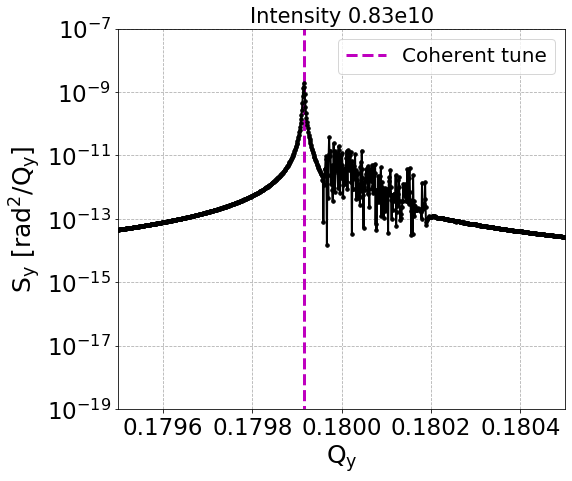

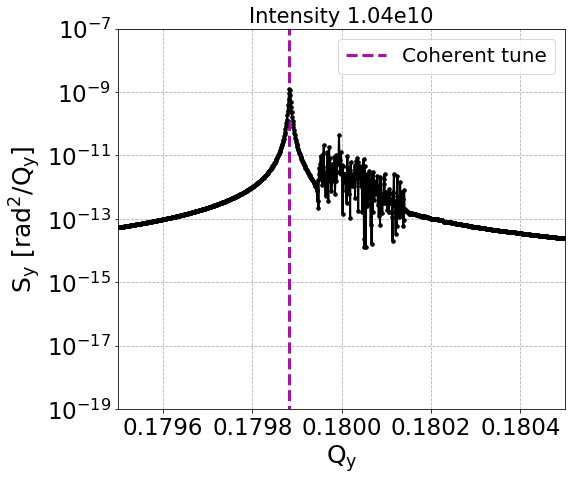

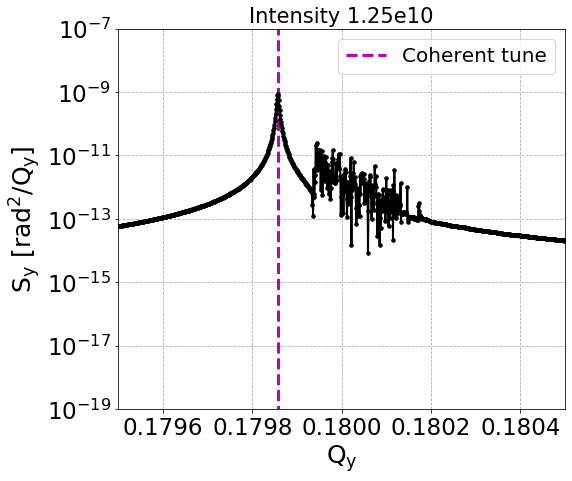

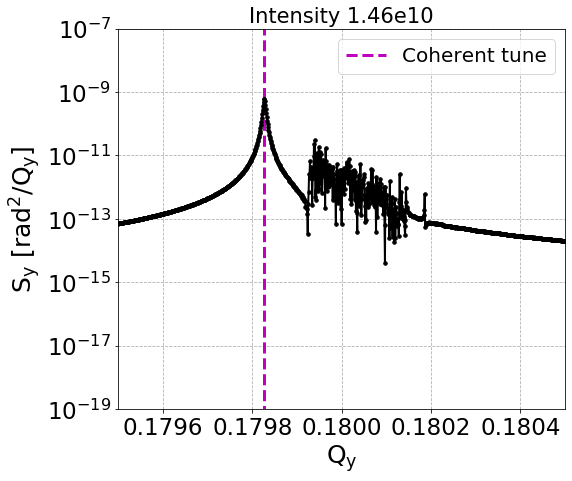

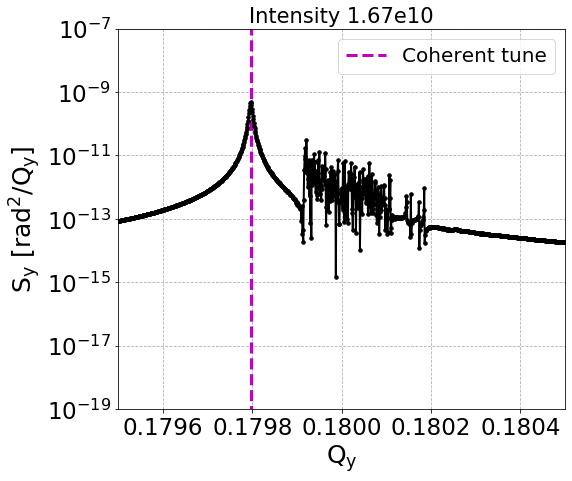

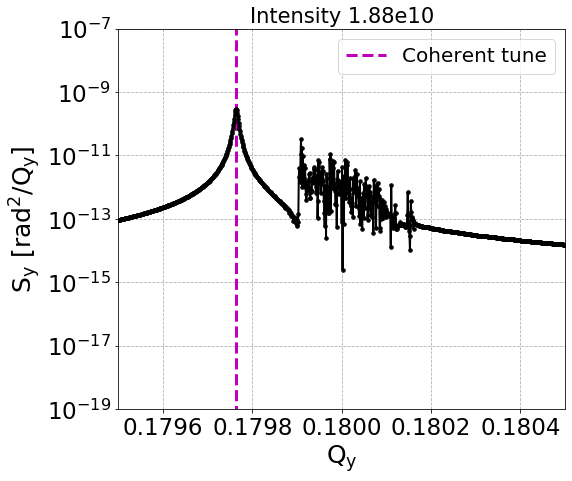

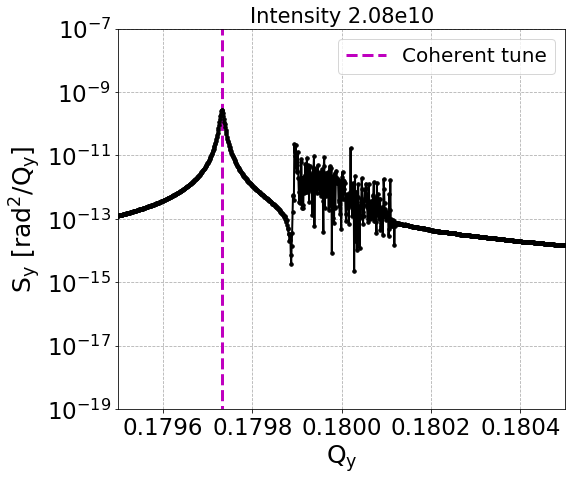

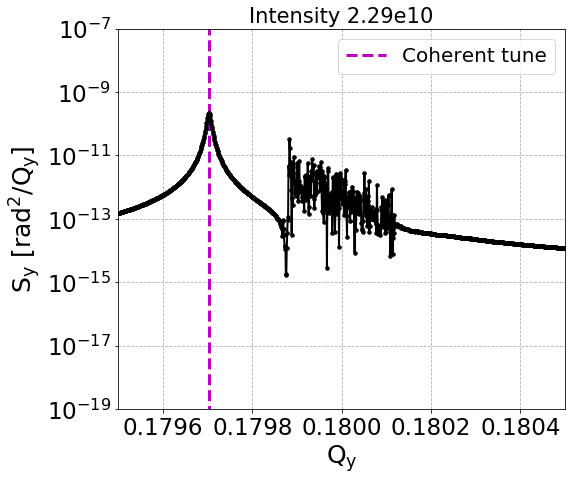

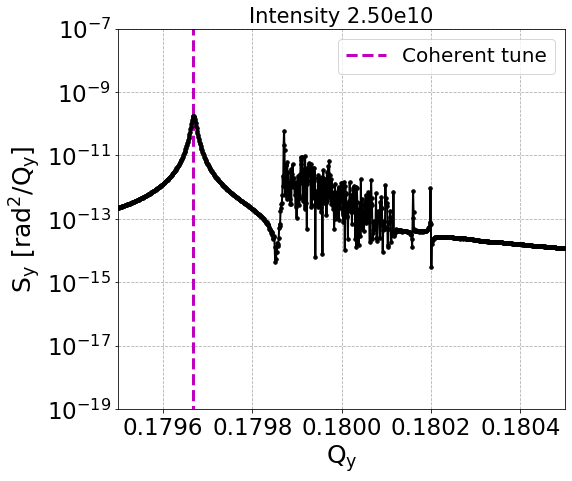

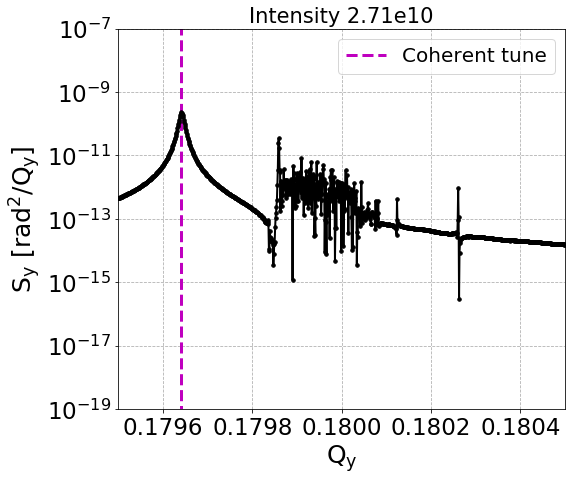

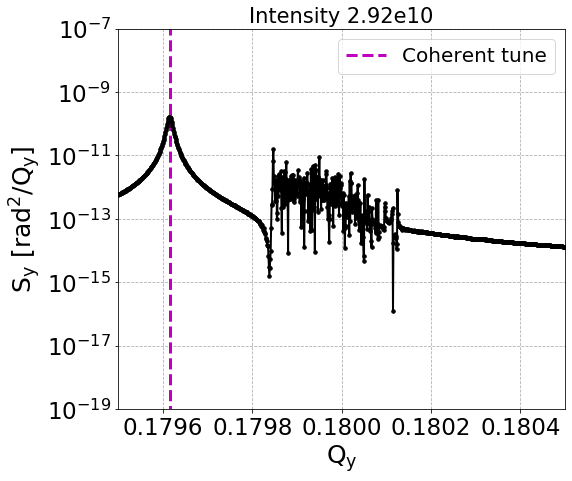

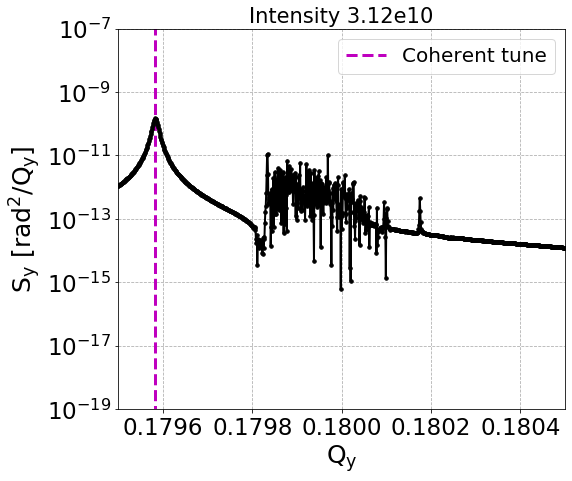

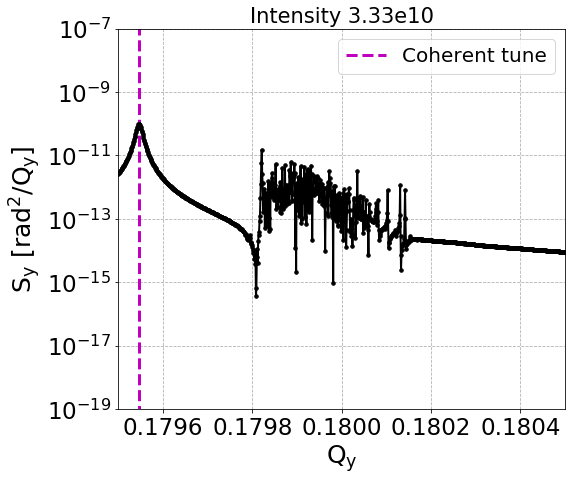

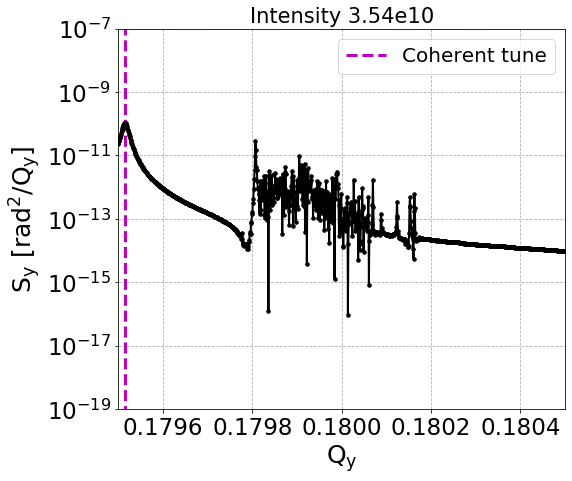

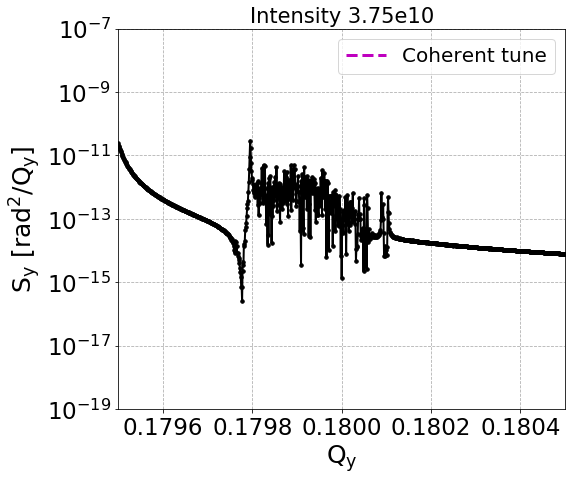

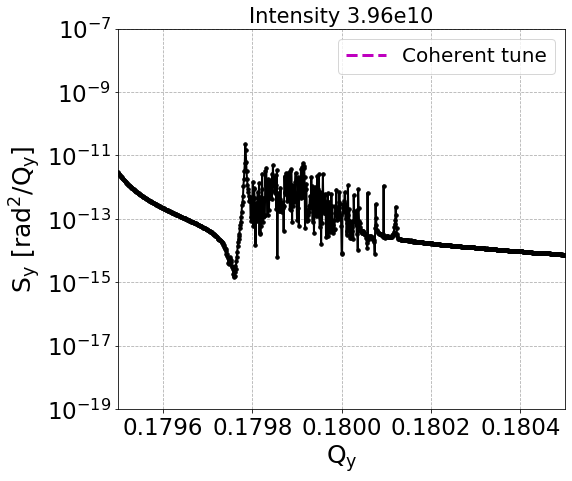

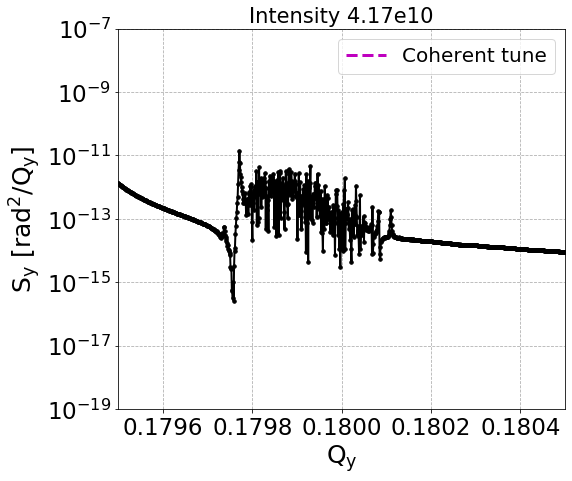

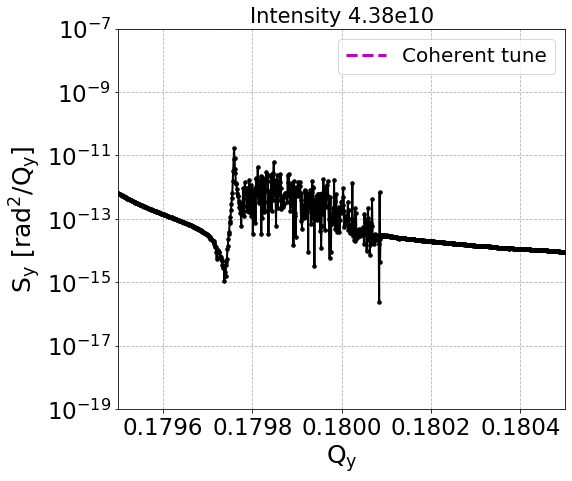

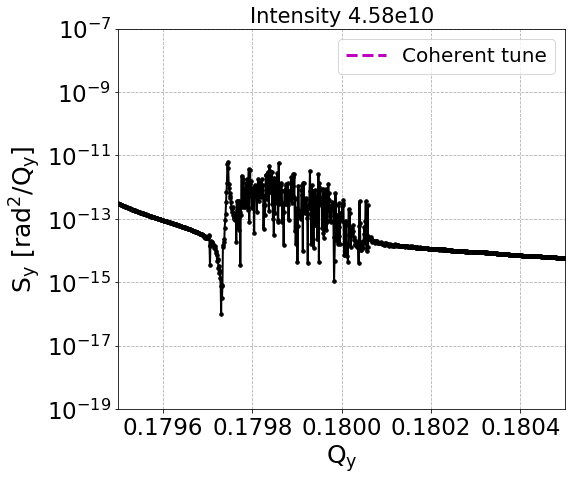

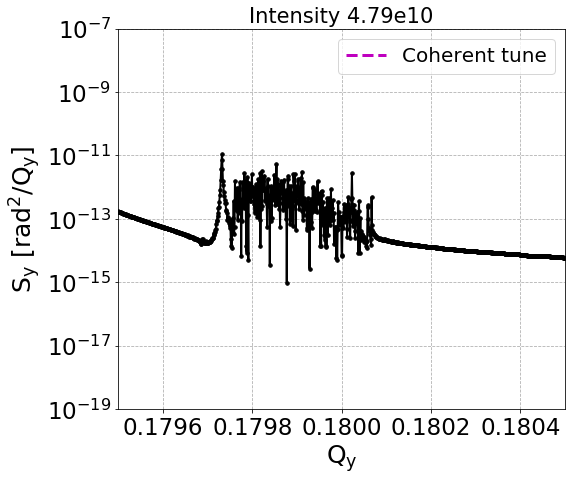

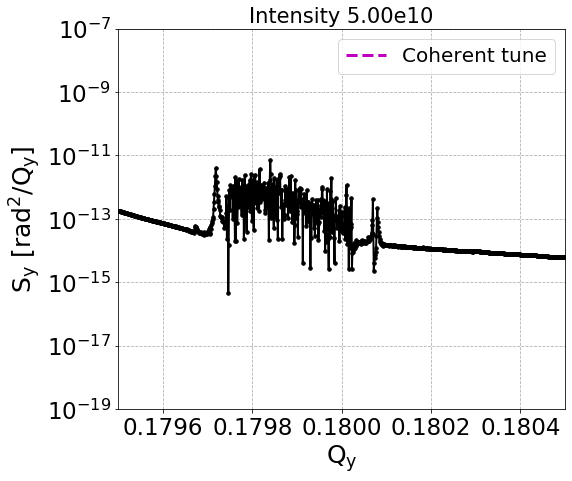

In [19]:
for intensity in intensity_scan:

    fig, ax = plt.subplots()
    
    meanY_temp = df[f'intensity_{intensity/1e10:.2f}e10']['meanY']
    fft = np.fft.fft(meanY_temp)
    n = meanY_temp.size
    freq = np.fft.fftfreq(n)
        
    # cmpt psd
    freq_psd, psd = cmpt_psd(n_turns, frev, fft)
    ax.plot(np.fft.fftshift(freq_psd)/frev, np.fft.fftshift(psd),'.-', c='k')
    
    # cmpt tune
    a = np.abs(fft[:n//2])
    tune_freq=find_tune(a) 
        
    #ax.plot(freq[:n//2], np.abs(fft[:n//2]*1/n), '.-', c='k')
        
    ax.vlines(freq[:n//2][tune_freq], 0, 0.000002, lw=3, ls='--', color='m', label='Coherent tune') # plot tune
    print(f'tune freq {freq[:n//2][tune_freq]}') 
    
 
    ax.set_title(f'Intensity {intensity/1e10:.2f}e10')

    #ax.set_ylim(1e-16, 1e-7)
    ax.set_ylim(1e-19, 1e-7)
    ax.set_xlim(0.1785,0.182)
    #ax.set_xlim(0.1795,0.1805)
    
    
    
    # styling
    ax.grid(linestyle='--')

    ax.set_yscale('log')

    ax.set_xlabel(r'$\mathrm{Q_y}$')
    ax.set_ylabel(r'$\mathrm{S_y \ [rad^2/Q_y]}$') # not entirely sure, discuss it with Hannes.
    ax.grid(linestyle='dashed')

    ax.legend(loc=1)


    savefig = False
    if savefig:
        plt.savefig(f'output/psdY_{study_name}_intensity{intensity/1e10:.2f}e10.png', bbox_inches='tight')

### Plot PSD, x -plane, for each initial value

sampling ratio Df=0.0433754981851209
tune freq [0.130028]
sampling ratio Df=0.0433754981851209
tune freq [0.130017]
sampling ratio Df=0.0433754981851209
tune freq [0.130023]
sampling ratio Df=0.0433754981851209
tune freq [0.130027]
sampling ratio Df=0.0433754981851209
tune freq [0.130028]
sampling ratio Df=0.0433754981851209
tune freq [0.13003]
sampling ratio Df=0.0433754981851209
tune freq [0.13003]
sampling ratio Df=0.0433754981851209
tune freq [0.13003]
sampling ratio Df=0.0433754981851209
tune freq [0.130029]
sampling ratio Df=0.0433754981851209
tune freq [0.130029]
sampling ratio Df=0.0433754981851209
tune freq [0.130029]
sampling ratio Df=0.0433754981851209
tune freq [0.130027]
sampling ratio Df=0.0433754981851209
tune freq [0.130026]
sampling ratio Df=0.0433754981851209
tune freq [0.130025]
sampling ratio Df=0.0433754981851209
tune freq [0.130025]
sampling ratio Df=0.0433754981851209
tune freq [0.130023]
sampling ratio Df=0.0433754981851209
tune freq [0.130022]
sampling ratio Df

/home/natalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


sampling ratio Df=0.0433754981851209
tune freq [0.130018]
sampling ratio Df=0.0433754981851209
tune freq [0.130017]
sampling ratio Df=0.0433754981851209
tune freq [0.130017]
sampling ratio Df=0.0433754981851209
tune freq [0.130014]
sampling ratio Df=0.0433754981851209
tune freq [0.130014]


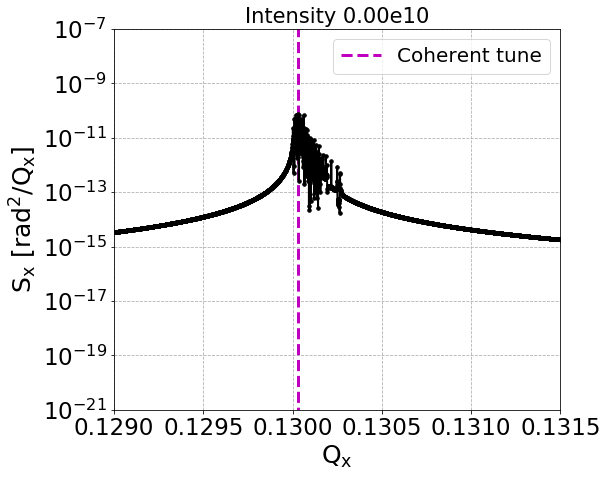

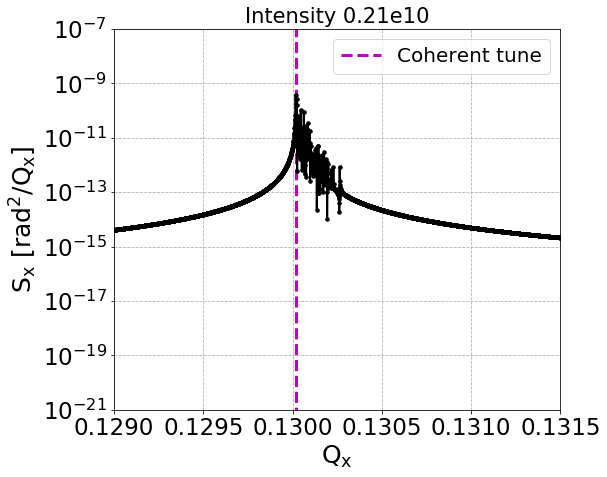

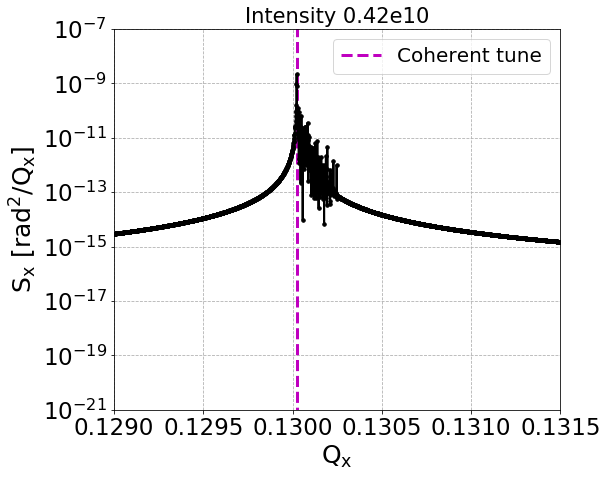

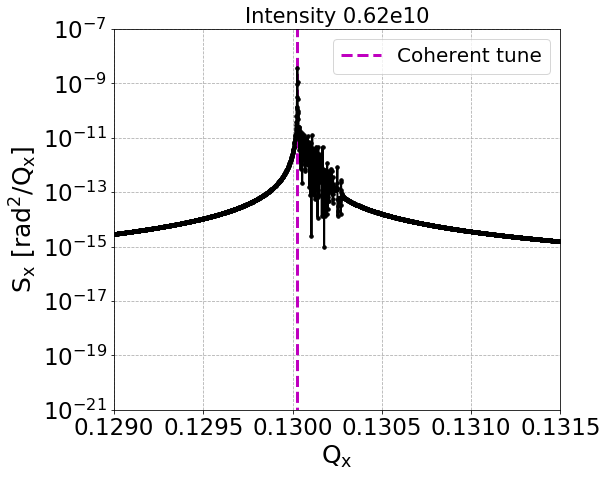

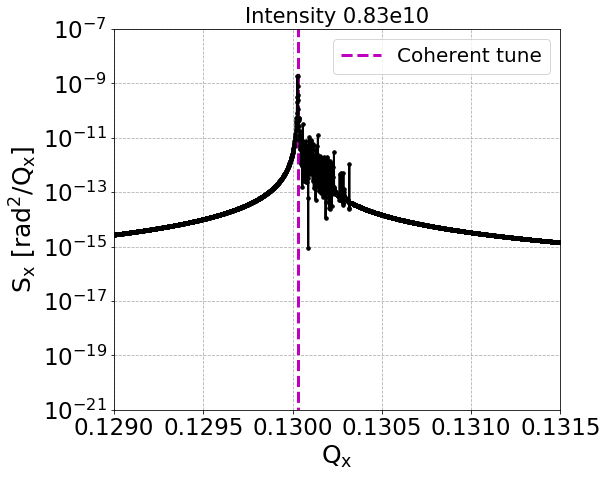

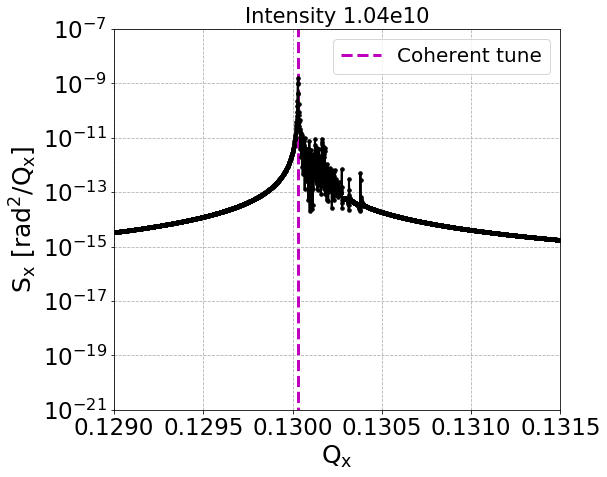

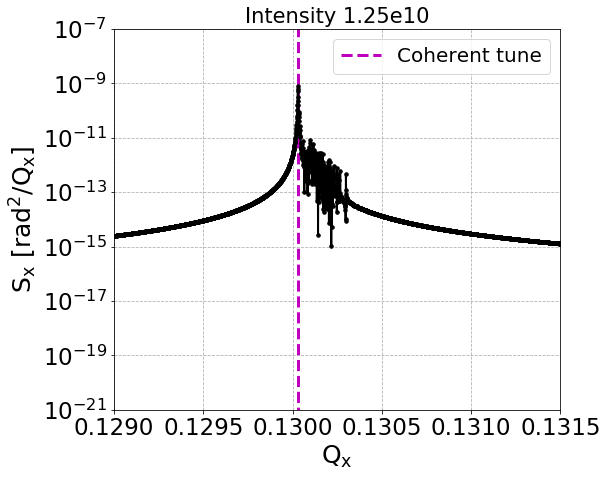

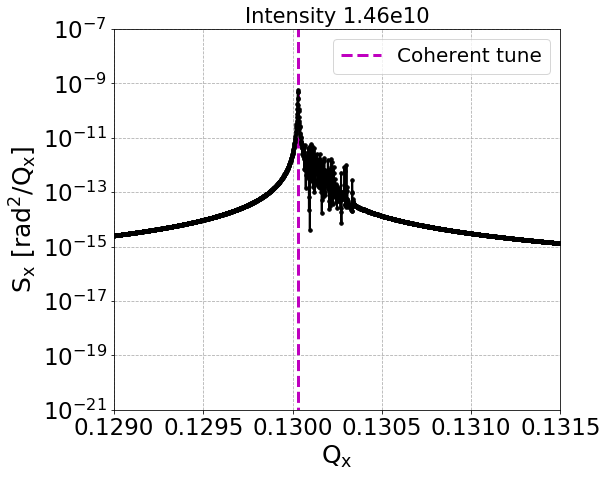

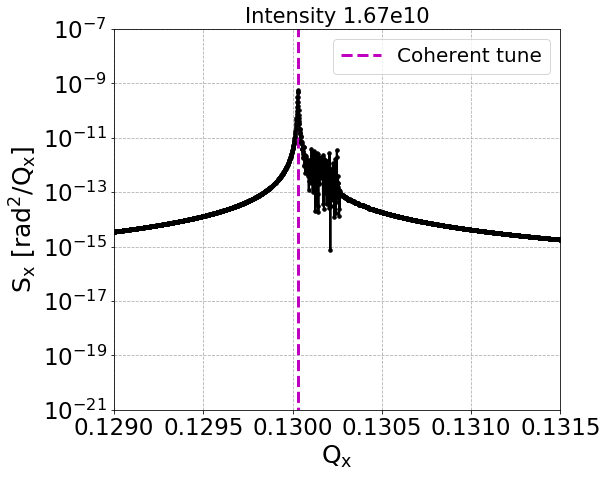

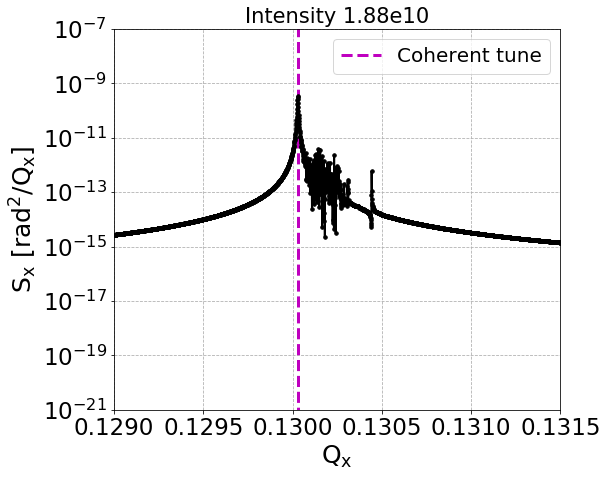

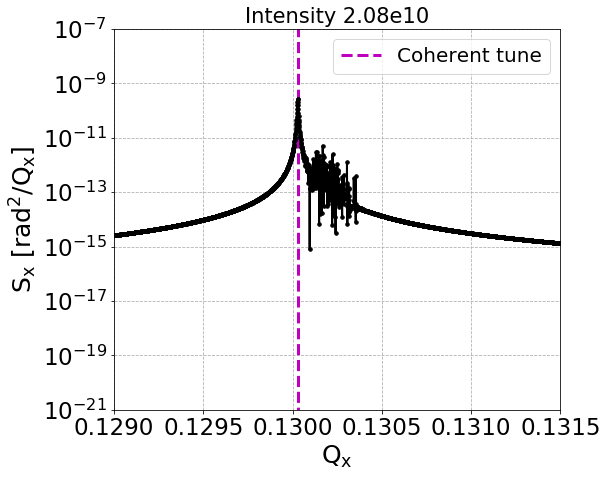

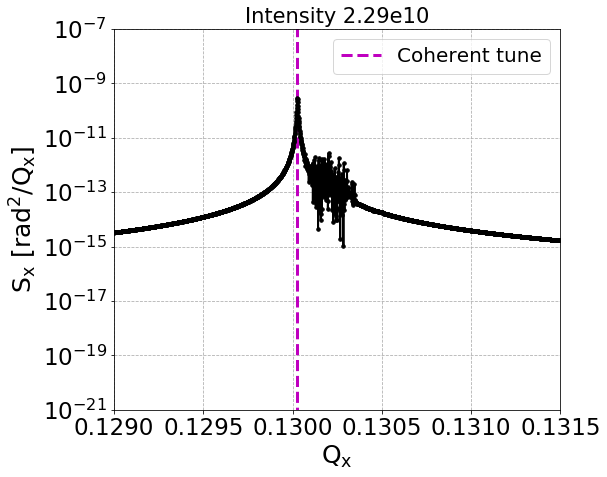

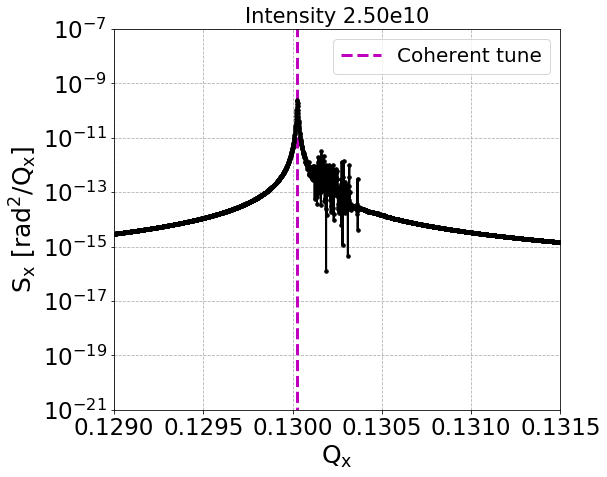

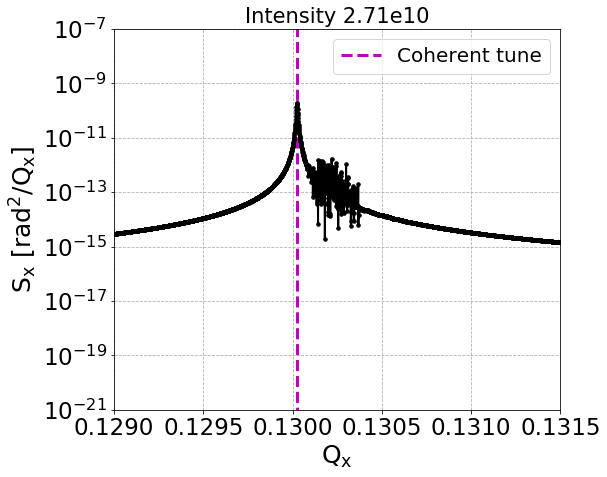

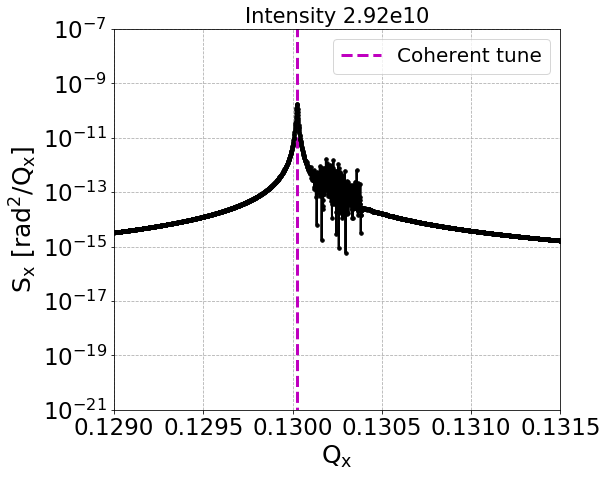

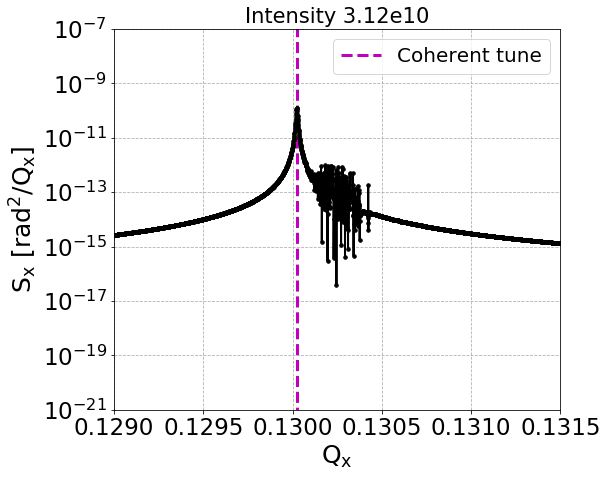

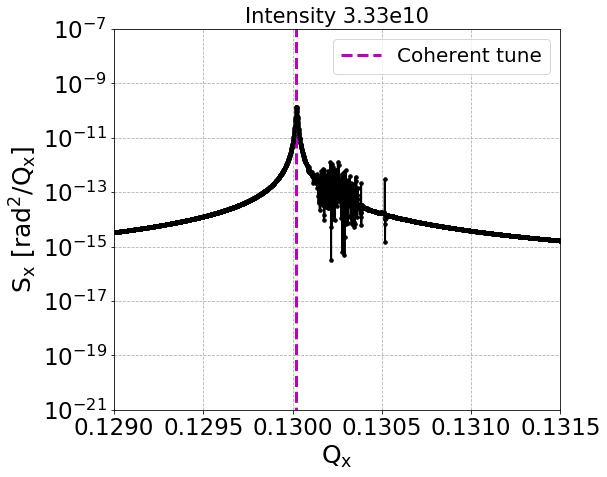

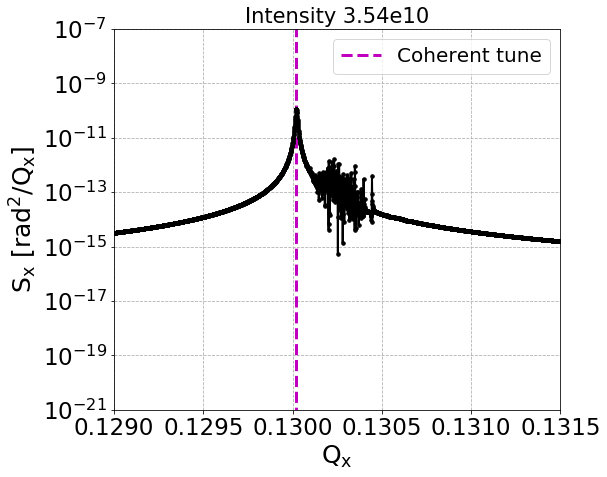

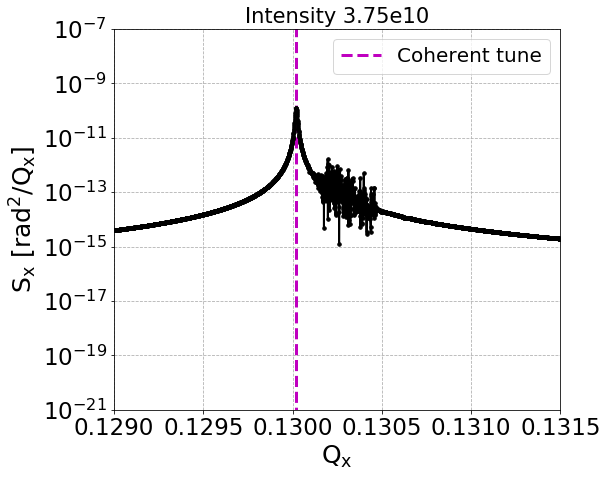

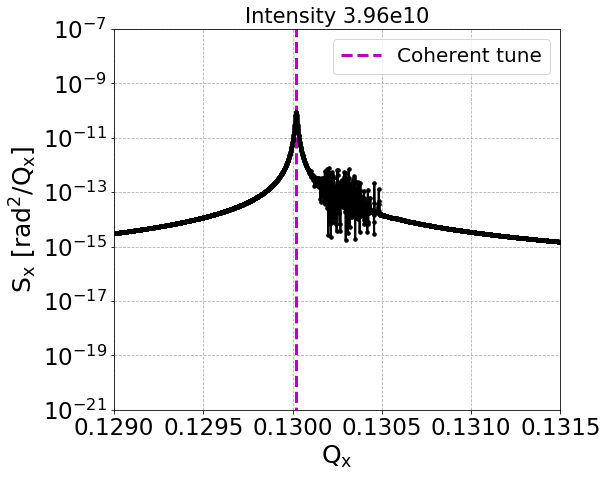

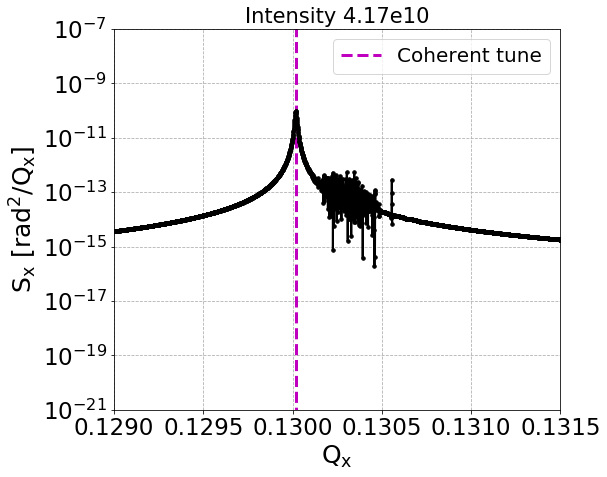

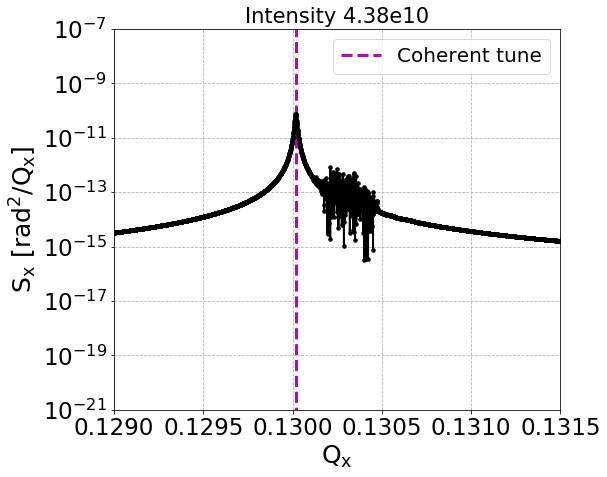

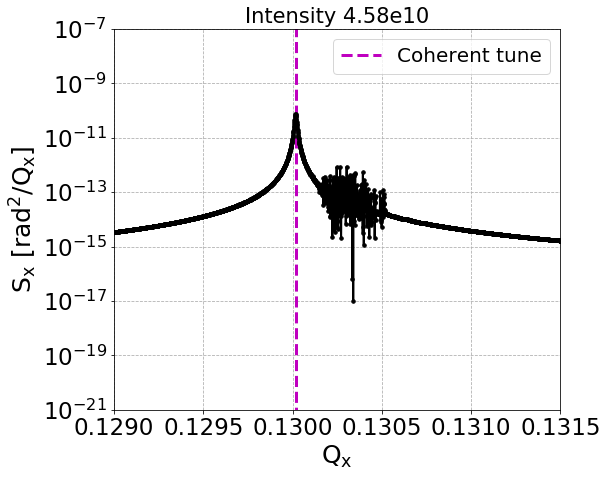

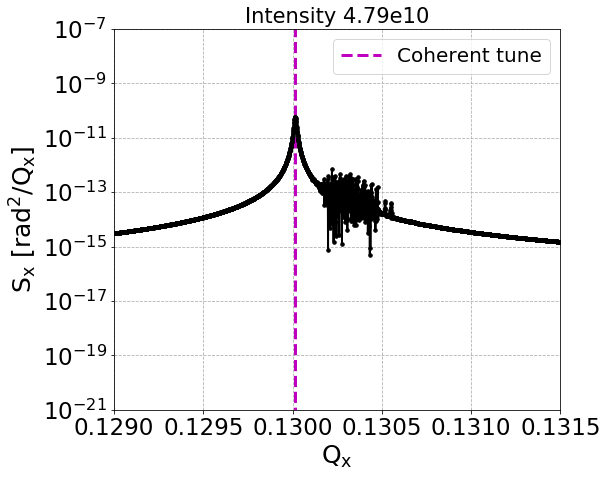

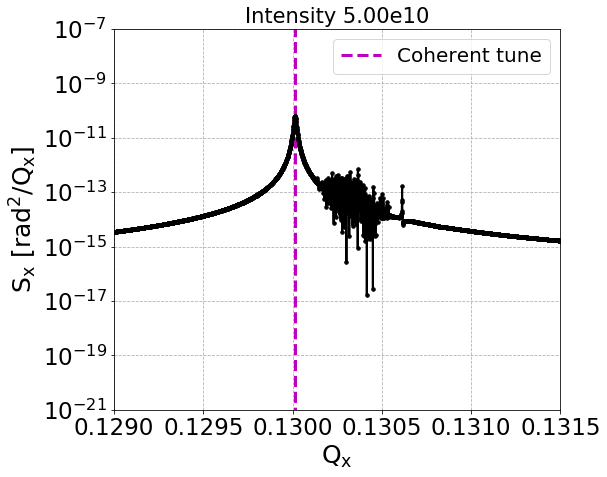

In [26]:
coherent_tunes_list_x = []
for intensity in intensity_scan:

    fig, ax = plt.subplots()
    
    meanX_temp = df[f'intensity_{intensity/1e10:.2f}e10']['meanX']
    fft = np.fft.fft(meanX_temp)
    n = meanX_temp.size
    freq = np.fft.fftfreq(n)
        
    # cmpt psd
    freq_psd, psd = cmpt_psd(n_turns, frev, fft)
    ax.plot(np.fft.fftshift(freq_psd)/frev, np.fft.fftshift(psd),'.-', c='k')
    
    # cmpt tune
    a = np.abs(fft[:n//2])
    tune_freq=find_tune(a) 
    coherent_tunes_list_x.append(freq[:n//2][tune_freq])
        
        
    #ax.plot(freq[:n//2], np.abs(fft[:n//2]*1/n), '.-', c='k')
        
    ax.vlines(freq[:n//2][tune_freq], 0, 0.000002, lw=3, ls='--', color='m', label='Coherent tune') # plot tune
    print(f'tune freq {freq[:n//2][tune_freq]}') 
    
 
    ax.set_title(f'Intensity {intensity/1e10:.2f}e10')

    #ax.set_ylim(1e-16, 1e-7)
    ax.set_ylim(1e-21, 1e-7)
    ax.set_xlim(0.129,0.1315)
    
    # styling
    ax.grid(linestyle='--')

    ax.set_yscale('log')

    ax.set_xlabel(r'$\mathrm{Q_x}$')
    ax.set_ylabel(r'$\mathrm{S_x \ [rad^2/Q_x]}$') # not entirely sure, discuss it with Hannes.
    ax.grid(linestyle='dashed')

    ax.legend(loc=1)


    savefig = True
    if savefig:
        plt.savefig(f'output/psdX_{study_name}_intensity{intensity/1e10:.2f}e10.png', bbox_inches='tight')

### Plot the emittance evolution in both x-plane and y-plane

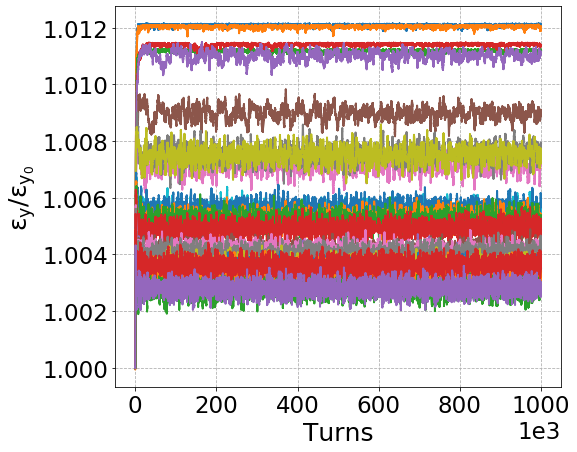

In [13]:
fig, ax = plt.subplots()
for intensity in intensity_scan:

    emitY = df[f'intensity_{intensity/1e10:.2f}e10']['emitY']
    
    ax.plot(np.arange(n_turns), emitY/emitY[0], label=f'Intensity={intensity/1e10:.2f}e10')
    
    # styling
    ax.grid(linestyle='--')

    
    ax.ticklabel_format(axis="x", style="sci", scilimits=(3,3))

    ax.set_xlabel('Turns')
    ax.set_ylabel(r'$\mathrm{\epsilon_y/ \epsilon_{y_0}}$') # not entirely sure, discuss it with Hannes.
    ax.grid(linestyle='dashed')

    # Put a legend to the right of the current axis
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


savefig = True
if savefig:
    plt.savefig(f'output/emitY_{study_name}_intensity{intensity/1e10:.2f}e10.png', bbox_inches='tight')

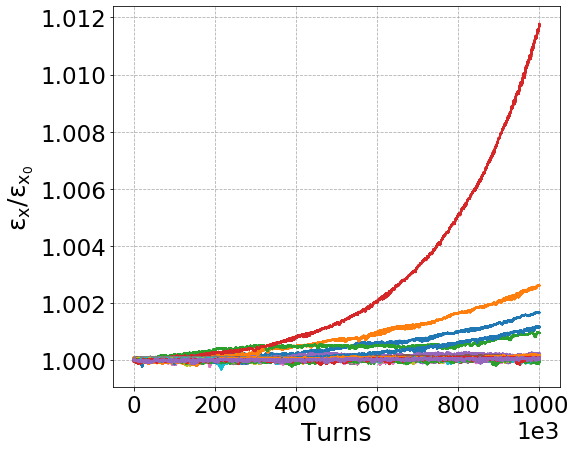

In [15]:
fig, ax = plt.subplots()
for intensity in intensity_scan: # 13:14, 11:12

    emitX = df[f'intensity_{intensity/1e10:.2f}e10']['emitX']
    
    ax.plot(np.arange(n_turns), emitX/emitX[0], label=f'Intensity={intensity/1e10:.2f}e10')
    #ax.plot(np.arange(n_turns), emitX, label=f'Intensity={intensity/1e10:.2f}e10')
    
    # stylingTrue
    ax.grid(linestyle='--')

    
    ax.ticklabel_format(axis="x", style="sci", scilimits=(3,3))

    ax.set_xlabel('Turns')
    ax.set_ylabel(r'$\mathrm{\epsilon_x/ \epsilon_{x_0}}$') # not entirely sure, discuss it with Hannes.
    ax.grid(linestyle='dashed')

    # Put a legend to the right of the current axis
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
savefig = True
if savefig:
    plt.savefig(f'output/emitX_{study_name}_intensity{intensity/1e10:.2f}e10.png', bbox_inches='tight')

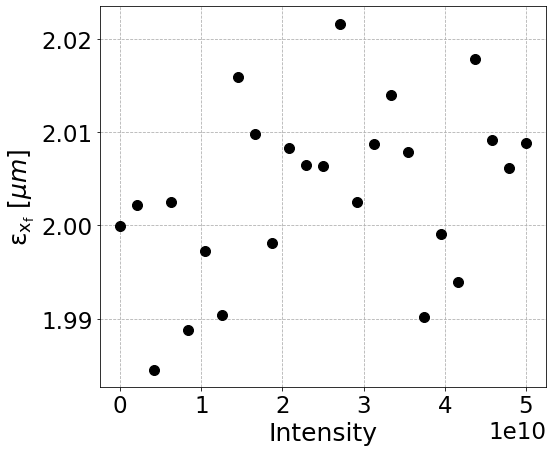

In [15]:
fig, ax = plt.subplots()

for intensity in intensity_scan: # 13:14, 11:12
    emitX = df[f'intensity_{intensity/1e10:.2f}e10']['emitX'][-1]*1e6

    ax.plot(intensity, emitX, 'o', ms=10, c='k')
ax.set_xlabel('Intensity')
ax.set_ylabel(r'$\mathrm{\epsilon_{x_f}} \ [\mu m]}$')
ax.grid(linestyle='dashed')

### Plot the coherent tune shift with intensity

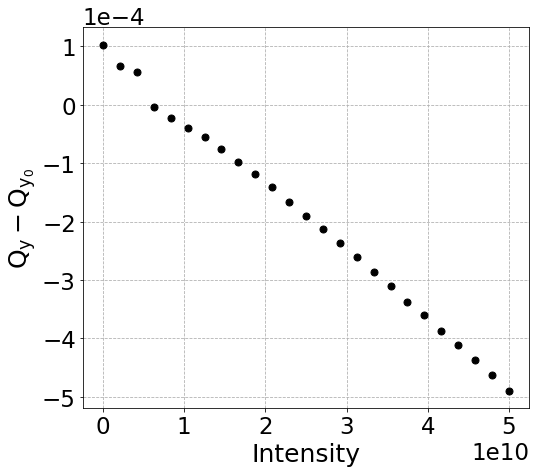

In [16]:
fig, ax = plt.subplots()
ax.plot(intensity_scan, np.array(coherent_tunes_list_y)-0.18, 'o', c='k')

ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set_xlabel('Intensity')
ax.set_ylabel(r'$\mathrm{Q_y-Q_{y_0}}$')
ax.grid(linestyle='dashed')


savefig=True
if savefig:
    plt.savefig(f'./output/DeltaQcohY_with_Intensity_{study_name}.png',  bbox_inches='tight')

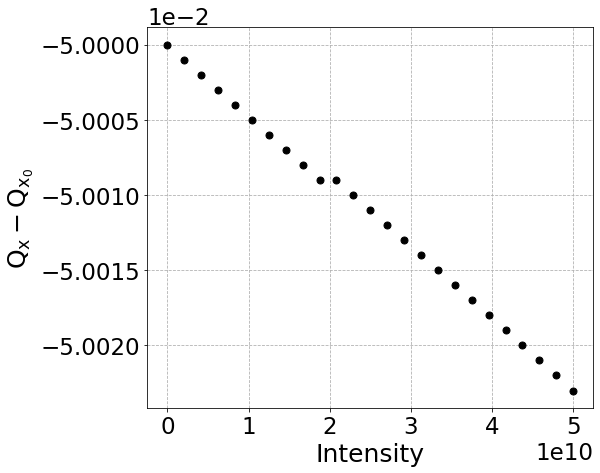

In [17]:
fig, ax = plt.subplots()
ax.plot(intensity_scan, np.array(coherent_tunes_list_x)-0.18, 'o', c='k')

ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set_xlabel('Intensity')
ax.set_ylabel(r'$\mathrm{Q_x-Q_{x_0}}$')
ax.grid(linestyle='dashed')


savefig=True
if savefig:
    plt.savefig(f'./output/DeltaQcohX_with_Intensity_{study_name}.png',  bbox_inches='tight')

In [92]:
# Load the initial bunch to compute the initial Jx,Jy
bunch = pickle.load(open(f'{path2data}{study_name}/bunch2', 'rb'))


In [93]:

# Optics at the start of the lattice
beta_y = 73.81671646
beta_x = 30.31164764
alpha_y = 0
alpha_x = 0

# Coordinates
x, px = bunch.x, bunch.xp
y, py =  bunch.y, bunch.yp

# Normalised coordinates 
x_n, px_n = cmpt_normalised_coordinates(x, px, beta_x, alpha_x)
y_n, py_n = cmpt_normalised_coordinates(y, py, beta_y, alpha_y)


# Compute actions
Jx_init = cmpt_actions(x_n, px_n)
Jy_init = cmpt_actions(y_n, py_n)


rms_Jx_init = np.std(Jx_init)
rms_Jy_init = np.std(Jy_init)

print(f'rms(Jx)={rms_Jx_init} m')
print(f'rms(Jy)={rms_Jy_init} m')

rms(Jx)=7.075292343324879e-09 m
rms(Jy)=6.94837449250389e-09 m


In [94]:
expected_DQ = amplitude_detuning_y(Jx_init, Jy_init, a_yy, a_xy)

In [95]:
rms_expected_DQ = rms_amplitude_detuning_y(Jy_init, Jx_init, ayy, axy)
print(rms_expected_DQ)

8.490350811989856e-05


In [98]:
# Compute the coherent tune shift from impedance

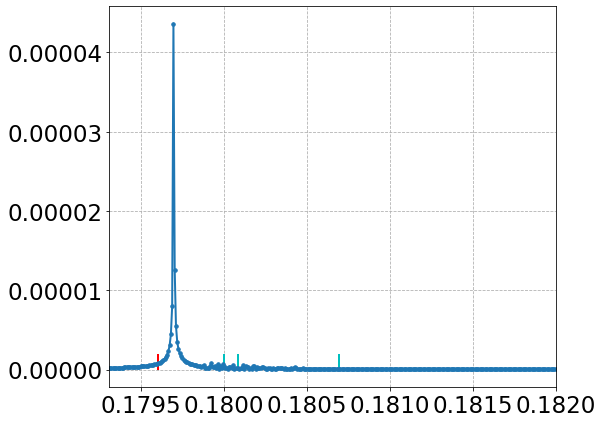

In [100]:
plt.plot(freq[:n//2], np.abs(fft[:n//2]*1/n), '.-')

plt.vlines(0.18, 0, 0.000002, color='c')
plt.vlines(0.18+rms_expected_DQ, 0, 0.000002, color='c')
plt.vlines(0.18+np.max(expected_DQ), 0, 0.000002, color='c')
plt.vlines(0.18-4e-4 , 0, 0.000002, color='r')

plt.xlim(0.18-np.max(expected_DQ),0.182)
#plt.ylim(0,0.00001)
plt.grid(linestyle='--')